# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

#### Выполнила:
    Тихонова Анна БЭК146 (4 курс, сложная)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [2]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Загрузим данные:

In [3]:
data = pd.read_csv("adult.data",header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

Посмотрим на данные:

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Перейдем к анализу данных.

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [5]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

В данной нам выборке 
- Мужчин 21790
- Женщин 10771

### Вопрос 2
Каков средний возраст мужчин?


In [6]:
data.groupby('sex')['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

Средний возраст мужчин в выборке : 39.433547

### Вопрос 3
Какова доля граждан США?

In [20]:
data['native-country'].value_counts()['United-States']/data['native-country'].count()

0.89585700684868397

Разделив количество наблюдений, в которых люди в пункте native-country указали United-States, на общее число наблюдений мы получим долю людей с гражданством США.

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

Построим сначала распределение по education-num, а затем по education, и проанализируем получаенный результаты. 

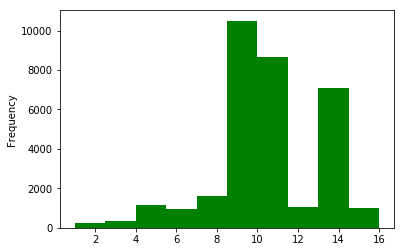

In [22]:
data['education-num'].plot(kind='hist', color = 'green')

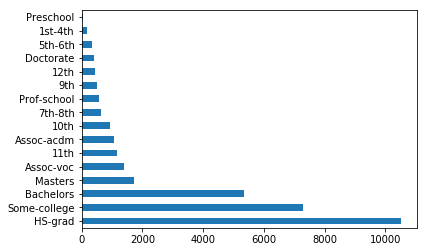

In [7]:
data['education'].value_counts().plot(kind='barh')

Видим, что в нашей выборке бОльшую часть составляют люди с Higher School образованием, чуть меньше закончили колледж. Также много бакалавров и чуть меньше магистров.

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [14]:
data.groupby('marital-status')['fnlwgt'].agg({'mean': np.mean, 'std': np.std})

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,mean,std
marital-status,,
Divorced,185802.790457,105646.789459
Married-AF-spouse,188165.565217,139868.801057
Married-civ-spouse,186763.172877,103097.543011
Married-spouse-absent,193141.760766,114937.598737
Never-married,195383.308996,107765.354649
Separated,206444.325854,117601.326229
Widowed,174159.042296,94005.379316


Мы посмотрели на среднее и стандартное отклонение для людей, имеющих разное семейное положение, но нам требуется узнать только для разведенных, то есть для "Divorced". Поэтому выпишем отдельно для этой группы людей: 

- Среднее

In [23]:
data.groupby('marital-status')['fnlwgt'].mean()['Divorced']

185802.79045689848

- Стандартное отклонение

In [24]:
data.groupby('marital-status')['fnlwgt'].std()['Divorced']

105646.78945933616

### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [25]:
data.groupby('50K')['education'].value_counts()[">50K"]

education
Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

Итак, среди людей, зарабатывающих >50К, больше всего бакалавров, то есть людей, получивших высшее образование. Однако так же достаточно много и выпускников школ и колледжей. Чтобы проверить достоверность утверждения, что в основном люди с вышим образованием зарабатывают больше 50К, необходимо посчитать долю людей с высшим образованием в множестве всех людей зарабатывающих больше 50К. 

- Доля Bachelors:

In [28]:
data.groupby('50K')['education'].value_counts()[">50K"]['Bachelors']/data.groupby('50K')['50K'].value_counts()[">50K"]

50K
>50K    0.283255
Name: 50K, dtype: float64

- Доля Masters:

In [29]:
data.groupby('50K')['education'].value_counts()[">50K"]['Masters']/data.groupby('50K')['50K'].value_counts()[">50K"]

50K
>50K    0.122306
Name: 50K, dtype: float64

- Доля Doctorate:

In [30]:
data.groupby('50K')['education'].value_counts()[">50K"]['Doctorate']/data.groupby('50K')['50K'].value_counts()[">50K"]

50K
>50K    0.039026
Name: 50K, dtype: float64

Всего людей, получивших высшее образование, среди тех, кто получается больше 50К:

In [31]:
print(0.283255+0.122306+0.039026)

0.44458699999999995


Почти половина, но все же меньше половины людей зарабатывыющих больше 50 тыс. имеют высшее образование.

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [9]:
data.groupby(['race','sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [11]:
data.groupby('occupation')['native-country'].value_counts()['Farming-fishing']

native-country
United-States    879
Mexico            77
?                  5
Puerto-Rico        5
Guatemala          4
Philippines        4
Canada             2
Cuba               2
El-Salvador        2
Italy              2
Vietnam            2
Cambodia           1
England            1
France             1
Germany            1
Hong               1
Ireland            1
Japan              1
Poland             1
Portugal           1
Yugoslavia         1
Name: native-country, dtype: int64

Наглядно видно, что в США в разы больше людей работают фермерами/рыбаками, чем во всех остальных странах вместе взятых.

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


- Составим первое отношение: 

In [34]:
data.groupby('education')['sex'].value_counts()['Bachelors']['Male']/data.groupby('education')['sex'].value_counts()['Masters']['Male']

3.1474304970513902

- Составим второе отношение:

In [18]:
data.groupby('education')['sex'].value_counts()['Bachelors']['Female']/data.groupby('education')['sex'].value_counts()['Masters']['Female']

3.0205223880597014

3.15 > 3.02, то есть отношение бакалары/магистры для мужчин больше, чем для женщин. Значит, что мужчины чаще получают только степень бакалавра, в то время как у женщин меньшее различие между количеством человек получивших степени бакалавра и получивших степень магистра.

### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

Сначала найдем максимальное количество рабочих часов в неделю:

In [35]:
max_h = data['hours-per-week'].max()
print('Максимальное количество рабочих часов в неделю', max_h)

Максимальное количество рабочих часов в неделю 99


Теперь ответим на второй вопрос. Найдем количество людей, которые работают столько часов в неделю:

In [39]:
print('Работают 99 часов в неделю ', data['hours-per-week'].value_counts()[max_h], 'человек')

Работают 99 часов в неделю  85 человек


А теперь найдем заработок этих людей:

In [40]:
data.groupby('hours-per-week')['50K'].value_counts()[99]

50K
<=50K    60
>50K     25
Name: 50K, dtype: int64

То есть ≤50К зарабатывают 60 человек из 85, а >50К зарабатыват только 25 человек, работающих по 99 часов в неделю. 